[0.9656183446626019, 0.7901362429617528, 0.9642957862901265, 0.9620834184244049, 0.9629722554482598]
Best Algorithm: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
Accuracy: 0.9656183446626019


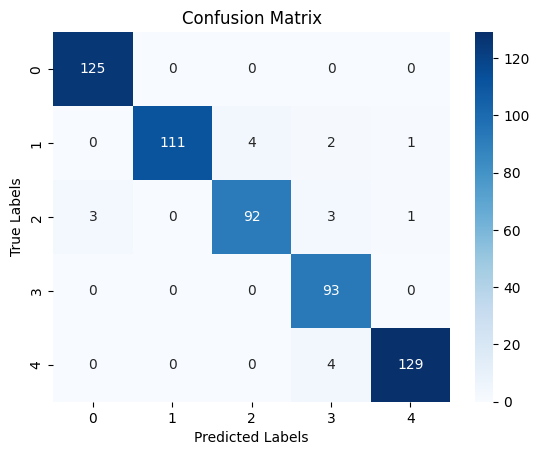

Classification Report:
              precision    recall  f1-score   support

  dependable       0.98      1.00      0.99       125
 extraverted       1.00      0.94      0.97       118
      lively       0.96      0.93      0.94        99
 responsible       0.91      1.00      0.95        93
     serious       0.98      0.97      0.98       133

    accuracy                           0.97       568
   macro avg       0.97      0.97      0.97       568
weighted avg       0.97      0.97      0.97       568



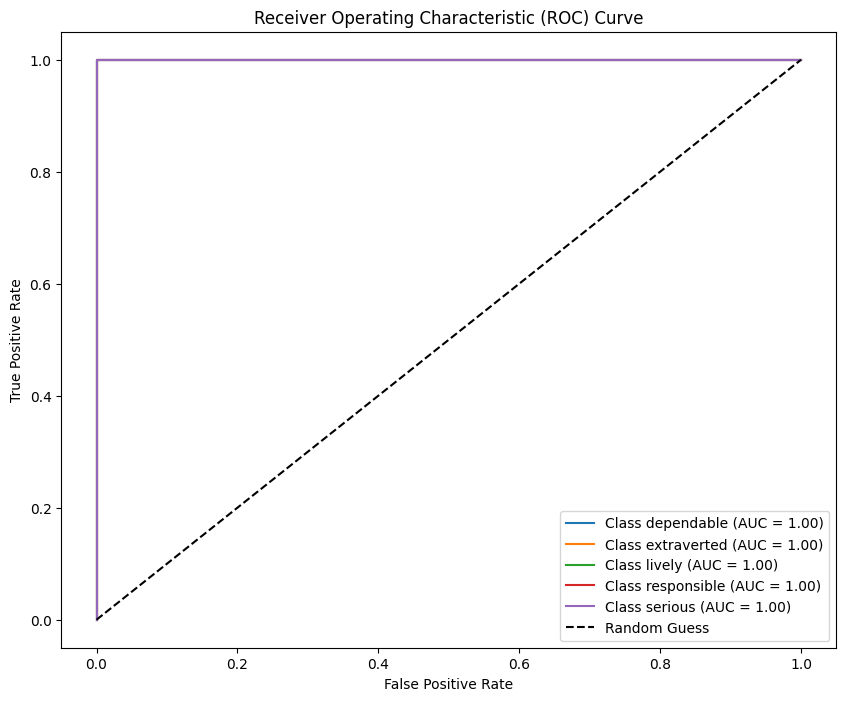

Micro-averaged Precision: 0.9683098591549296
Micro-averaged Recall: 0.9683098591549296
Micro-averaged F1-score: 0.9683098591549296


In [52]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns


# Load the train dataset
train_data = pd.read_csv('traindataset.csv')
train_data1 = pd.read_csv('traindataset.csv')

# Preprocessing
train_data.loc[train_data['Gender'] == 'Male', 'Gender'] = 1
train_data.loc[train_data['Gender'] == 'Female', 'Gender'] = 0
train_data.fillna(0, inplace=True)

train_data1.loc[train_data1['Gender'] == 'Male', 'Gender'] = 1
train_data1.loc[train_data1['Gender'] == 'Female', 'Gender'] = 0
train_data1.loc[train_data1['Personality (Class label)'] == 'extraverted', 'Personality (Class label)'] = 0
train_data1.loc[train_data1['Personality (Class label)'] == 'serious', 'Personality (Class label)'] = 1
train_data1.loc[train_data1['Personality (Class label)'] == 'dependable', 'Personality (Class label)'] = 2
train_data1.loc[train_data1['Personality (Class label)'] == 'lively', 'Personality (Class label)'] = 3
train_data1.loc[train_data1['Personality (Class label)'] == 'responsible', 'Personality (Class label)'] = 4
train_data1.to_csv('output3.csv', index=False)

# Split the train dataset into training and testing subsets
train_X, test_X, train_y, test_y = train_test_split(train_data.iloc[:, :-1].values, train_data.iloc[:, -1].values, test_size=0.2, random_state=42)

# Feature scaling
scaler = preprocessing.StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_X, train_y)

# Decision Trees
dt = DecisionTreeClassifier()
dt.fit(train_X, train_y)

train1_X, test1_X, train1_y, test1_y = train_test_split(train_data1.iloc[:, :-1].values, train_data1.iloc[:, -1].values, test_size=0.2, random_state=42)

et_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_classifier.fit(train_X, train_y)


et_pred = et_classifier.predict(test_X)

# Calculate accuracy
accuracy1 = accuracy_score(test_y, et_pred)



# Create the LabelEncoder object
label_encoder = preprocessing.LabelEncoder()

# Encode the target variable
encoded_train_y = label_encoder.fit_transform(train_y)

# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(train_X, encoded_train_y)

# Make predictions on the testing data
encoded_test_y = label_encoder.transform(test_y)
y_pred = xgb_classifier.predict(test_X)
decoded_pred_y = label_encoder.inverse_transform(y_pred)

# Calculate accuracy
accuracy = accuracy_score(test_y, decoded_pred_y)

# Applying k-nearest neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(train_X, train_y)

# Predict on the test dataset
knn_predictions = knn.predict(test_X)
rf_predictions = rf.predict(test_X)
dt_predictions = dt.predict(test_X)
y_pred = xgb_classifier.predict(test1_X)
et_pred = et_classifier.predict(test_X)


# Combine the predictions into a DataFrame
predictions_df = pd.DataFrame({
    'k-Nearest Neighbors': knn_predictions,
    'Random Forest': rf_predictions,
    'Decision Trees': dt_predictions,
    'XGB': decoded_pred_y,
    'ET': et_pred
})

# Save the predictions to a CSV file
predictions_df.to_csv('output1.csv', index=False)

# Define the list of algorithms
algorithms = [xgb_classifier,knn,rf, dt,et_classifier]

# Perform cross-validation and evaluate the accuracy for each algorithm
accuracy_scores = []
for algorithm in algorithms:
    if algorithm == xgb_classifier:
        encoded_train_y = label_encoder.transform(train_y)
        scores = cross_val_score(algorithm, train_X, encoded_train_y, cv=5)
    else:
        scores = cross_val_score(algorithm, train_X, train_y, cv=5)
    accuracy_scores.append(scores.mean())
print(accuracy_scores)

# Find the algorithm with the highest accuracy
best_algorithm_index = np.argmax(accuracy_scores)
best_algorithm = algorithms[best_algorithm_index]

print("Best Algorithm:", best_algorithm)
print("Accuracy:", accuracy_scores[best_algorithm_index])

predictions1_df = pd.DataFrame({
    'personality': rf_predictions
})
predictions1_df.to_csv('output2.csv', index=False)





# Visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support


# Generate the classification report
report = classification_report(test_y, decoded_pred_y)

# Print the classification report
print("Classification Report:")
print(report)



from sklearn.metrics import auc

# Convert the predicted labels to one-hot encoded form
encoded_pred_y = label_encoder.transform(decoded_pred_y)
onehot_pred_y = np.eye(len(label_encoder.classes_))[encoded_pred_y]

# Calculate the probabilities for each class
proba_pred_y = best_algorithm.predict_proba(test_X)

# Compute the ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(onehot_pred_y[:, i], proba_pred_y[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(label_encoder.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Calculate the precision, recall, and F1-score using micro averaging
precision, recall, f1, _ = precision_recall_fscore_support(test_y, decoded_pred_y, average='micro')

# Print the precision, recall, and F1-score
print("Micro-averaged Precision:", precision)
print("Micro-averaged Recall:", recall)
print("Micro-averaged F1-score:", f1)


Best Algorithm: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
Accuracy: 0.9683098591549296
Confusion Matrix:
[[125   0   0   0   0]
 [  0 111   4   2   1]
 [  3   0  92   3   1]
 [  0   0   0  93   0]
 [  0   0   0   4 129]]


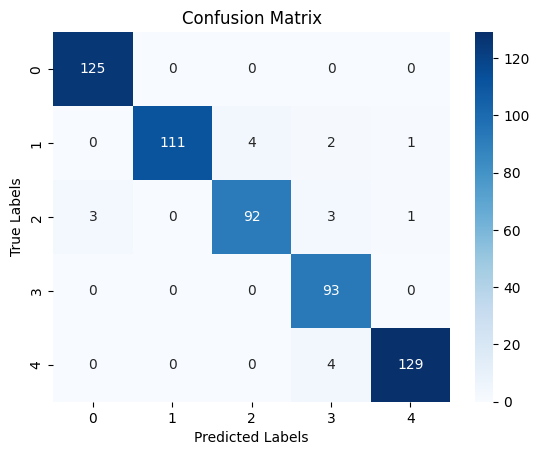

Classification Report:
              precision    recall  f1-score   support

  dependable       0.98      1.00      0.99       125
 extraverted       1.00      0.94      0.97       118
      lively       0.96      0.93      0.94        99
 responsible       0.91      1.00      0.95        93
     serious       0.98      0.97      0.98       133

    accuracy                           0.97       568
   macro avg       0.97      0.97      0.97       568
weighted avg       0.97      0.97      0.97       568



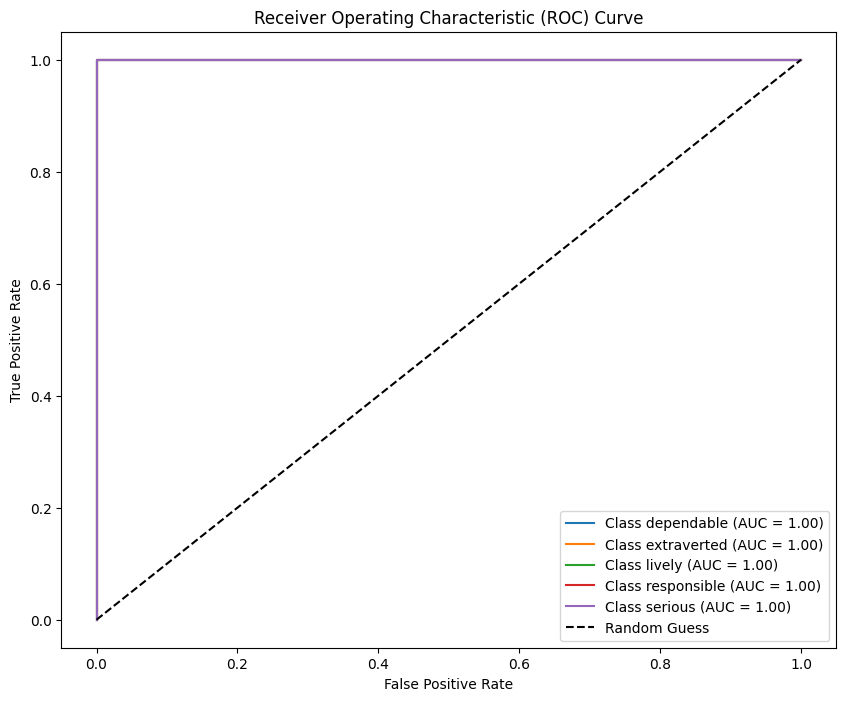

Micro-averaged Precision: 0.9683098591549296
Micro-averaged Recall: 0.9683098591549296
Micro-averaged F1-score: 0.9683098591549296


In [48]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, roc_curve, precision_recall_curve, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load the train dataset
train_data = pd.read_csv('traindataset.csv')
train_data1 = pd.read_csv('traindataset.csv')

# Preprocessing
train_data.loc[train_data['Gender'] == 'Male', 'Gender'] = 1
train_data.loc[train_data['Gender'] == 'Female', 'Gender'] = 0
train_data.fillna(0, inplace=True)

train_data1.loc[train_data1['Gender'] == 'Male', 'Gender'] = 1
train_data1.loc[train_data1['Gender'] == 'Female', 'Gender'] = 0
train_data1.loc[train_data1['Personality (Class label)'] == 'extraverted', 'Personality (Class label)'] = 0
train_data1.loc[train_data1['Personality (Class label)'] == 'serious', 'Personality (Class label)'] = 1
train_data1.loc[train_data1['Personality (Class label)'] == 'dependable', 'Personality (Class label)'] = 2
train_data1.loc[train_data1['Personality (Class label)'] == 'lively', 'Personality (Class label)'] = 3
train_data1.loc[train_data1['Personality (Class label)'] == 'responsible', 'Personality (Class label)'] = 4
train_data1.to_csv('output3.csv', index=False)

# Split the train dataset into training and testing subsets
train_X, test_X, train_y, test_y = train_test_split(train_data.iloc[:, :-1].values, train_data.iloc[:, -1].values, test_size=0.2, random_state=42)

# Feature scaling
scaler = preprocessing.StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_X, train_y)

# Decision Trees
dt = DecisionTreeClassifier()
dt.fit(train_X, train_y)

train1_X, test1_X, train1_y, test1_y = train_test_split(train_data1.iloc[:, :-1].values, train_data1.iloc[:, -1].values, test_size=0.2, random_state=42)

# Create the LabelEncoder object
label_encoder = preprocessing.LabelEncoder()

# Encode the target variable
encoded_train_y = label_encoder.fit_transform(train_y)

# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(train_X, encoded_train_y)

# Make predictions on the testing data
encoded_test_y = label_encoder.transform(test_y)
y_pred = xgb_classifier.predict(test_X)
decoded_pred_y = label_encoder.inverse_transform(y_pred)

# Calculate accuracy
accuracy = accuracy_score(test_y, decoded_pred_y)

# Applying k-nearest neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(train_X, train_y)

# Predict on the test dataset
knn_predictions = knn.predict(test_X)
rf_predictions = rf.predict(test_X)
dt_predictions = dt.predict(test_X)
y_pred = xgb_classifier.predict(test1_X)

# Combine the predictions into a DataFrame
predictions_df = pd.DataFrame({
    'k-Nearest Neighbors': knn_predictions,
    'Random Forest': rf_predictions,
    'Decision Trees': dt_predictions,
    'XGB': decoded_pred_y
})

# Save the predictions to a CSV file
predictions_df.to_csv('output1.csv', index=False)

# Define the list of algorithms
algorithms = [xgb_classifier, knn, rf, dt]

# Perform cross-validation and evaluate the accuracy for each algorithm
accuracy_scores = [accuracy]
for algorithm in algorithms:
    if algorithm == xgb_classifier:
        encoded_train_y = label_encoder.transform(train_y)
        scores = cross_val_score(algorithm, train_X, encoded_train_y, cv=5)
    else:
        scores = cross_val_score(algorithm, train_X, train_y, cv=5)
    accuracy_scores.append(scores.mean())

# Find the algorithm with the highest accuracy
best_algorithm_index = np.argmax(accuracy_scores)
best_algorithm = algorithms[best_algorithm_index]

print("Best Algorithm:", best_algorithm)
print("Accuracy:", accuracy_scores[best_algorithm_index])

predictions1_df = pd.DataFrame({
    'personality': rf_predictions
})
predictions1_df.to_csv('output2.csv', index=False)

# Make predictions on the testing data
y_pred = best_algorithm.predict(test_X)

# Generate the confusion matrix
cm = confusion_matrix(test_y, decoded_pred_y)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support


# Generate the classification report
report = classification_report(test_y, decoded_pred_y)

# Print the classification report
print("Classification Report:")
print(report)



from sklearn.metrics import auc

# Convert the predicted labels to one-hot encoded form
encoded_pred_y = label_encoder.transform(decoded_pred_y)
onehot_pred_y = np.eye(len(label_encoder.classes_))[encoded_pred_y]

# Calculate the probabilities for each class
proba_pred_y = best_algorithm.predict_proba(test_X)

# Compute the ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(onehot_pred_y[:, i], proba_pred_y[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(label_encoder.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Calculate the precision, recall, and F1-score using micro averaging
precision, recall, f1, _ = precision_recall_fscore_support(test_y, decoded_pred_y, average='micro')

# Print the precision, recall, and F1-score
print("Micro-averaged Precision:", precision)
print("Micro-averaged Recall:", recall)
print("Micro-averaged F1-score:", f1)



